In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/content/project/dataset/data"

Blight	Common_Rust  Gray_Leaf_Spot  Healthy


## **required libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.layers import Activation,Flatten, Dropout,Dense
from keras.layers import Conv2D, MaxPooling2D

In [8]:
print(tf.__version__)

2.15.0


In [9]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None


# **images converted into numpy array**

In [10]:
dir="/content/drive/MyDrive/content/project/dataset/data"
image_list,label_list=[],[]
all_labels=['Blight','Common_Rust','Gray_Leaf_Spot','Healthy']
binary_labels=[0,1,2]
for directory in ['Blight','Common_Rust','Gray_Leaf_Spot','Healthy']:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp=-1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


# **Visualize the class count and check for class imbalance **

In [11]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

2    1760
dtype: int64

In [12]:
image_list[0].shape

(256, 256, 3)

# **Splitting the dataset into train<validate and test sets**

In [13]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [14]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

# **perform one_hot encoding on target varaiable **

In [15]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# **CREATING THE MODEL ARCHITECTURE ,COMPILE TO MODEL AND THEN FIT IT USING THE TRAINING DATA**

In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])


In [18]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train)

In [19]:
epochs=50
batch_size=20
history=model.fit(x_train,y_train,batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/50
53/53 [==============================] - 70s 1s/step - loss: 0.0692 - accuracy: 0.9991 - val_loss: 2.5724e-04 - val_accuracy: 1.0000
Epoch 2/50
53/53 [==============================] - 66s 1s/step - loss: 2.1220e-04 - accuracy: 1.0000 - val_loss: 1.7128e-04 - val_accuracy: 1.0000
Epoch 3/50
53/53 [==============================] - 62s 1s/step - loss: 1.5464e-04 - accuracy: 1.0000 - val_loss: 1.2560e-04 - val_accuracy: 1.0000
Epoch 4/50
53/53 [==============================] - 64s 1s/step - loss: 1.1379e-04 - accuracy: 1.0000 - val_loss: 9.0111e-05 - val_accuracy: 1.0000
Epoch 5/50
53/53 [==============================] - 65s 1s/step - loss: 8.0949e-05 - accuracy: 1.0000 - val_loss: 6.1532e-05 - val_accuracy: 1.0000
Epoch 6/50
53/53 [==============================] - 65s 1s/step - loss: 5.3788e-05 - accuracy: 1.0000 - val_loss: 3.8263e-05 - val_accuracy: 1.0000
Epoch 7/50
53/53 [==============================] - 61s 1s/step - loss: 3.4230e-05 - accuracy: 1.0000 - val_loss: 2.

In [22]:
model.save("/content/drive/MyDrive/content/project/model/plant_disease_model.h5")

Text(0.5, 0, 'Epochs')

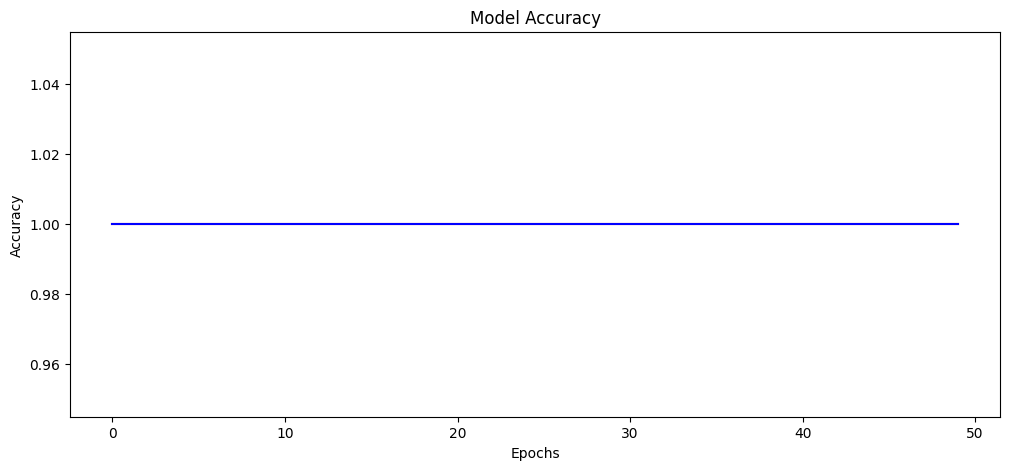

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")